# Estadísticas MexIHC 2024

## Estadísticas generales

| Track        | Aceptados | Rechazados | Total | Tasa de aceptación (%) |
|--------------|-----------|------------|-------|------------------------|
| Main         | 24        | 15         | 39    | 61.5  %                |
| Coloquio     | 4         | 3          | 7     | 57.1  %                |
| IMSABI       | 7         | 4          | 11    | 63.6  %                |
| AI in HCI    | 4         | 0          | 4     | 100   %                |
| Competencia  | 4         | 2          | 6     | 66.7  %                |
| Posters      | 6         | 4          | 10    | 60    %                |
| **Total**    | 49        | 28         | 77    | 63.6  %                |

###  Artículos aceptados y rechazados

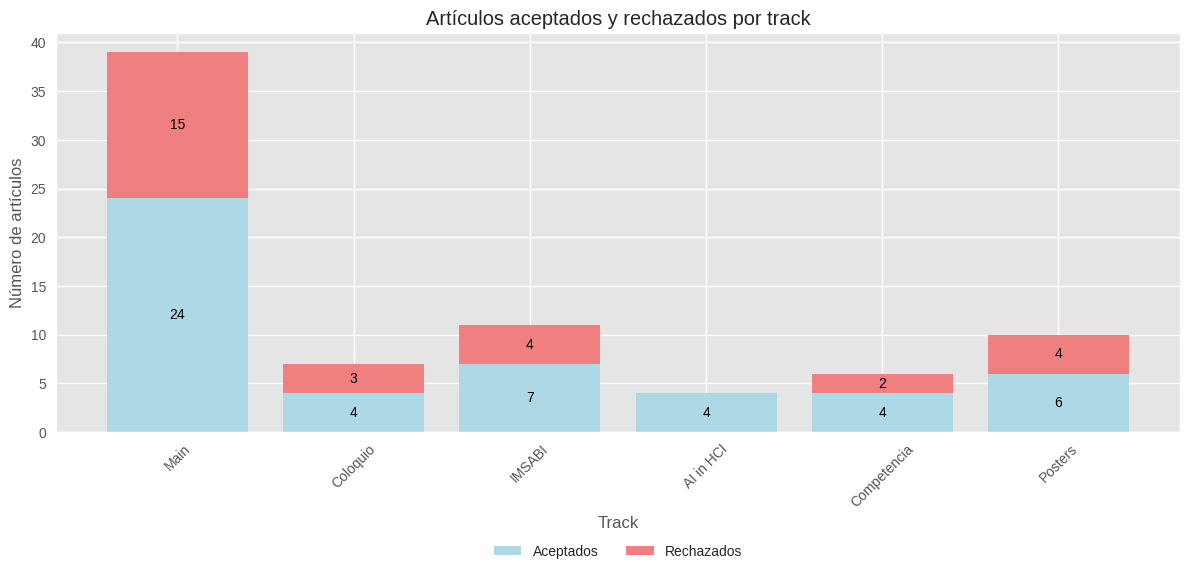

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

articulos = {
    'Track': ['Main', 'Coloquio', 'IMSABI', 'AI in HCI', 'Competencia', 'Posters'],
    'Aceptados': [24, 4, 7, 4, 4, 6],
    'Rechazados': [15, 3, 4, 0, 2, 4]
}

df_articulos = pd.DataFrame(articulos)

fig, ax = plt.subplots(figsize=(12, 6))
y_pos = range(len(df_articulos['Track']))

bars_aceptados = ax.bar(y_pos, df_articulos['Aceptados'], color='lightblue', label='Aceptados')
bars_rechazados = ax.bar(y_pos, df_articulos['Rechazados'], bottom=df_articulos['Aceptados'], color='lightcoral', label='Rechazados')

for bar in bars_aceptados:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(height)}', ha='center', va='center', color='black')

for bar in bars_rechazados:
    height = bar.get_height()
    if height > 0:  # Solo agregar etiqueta si la barra tiene valor mayor a 0
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{int(height)}', ha='center', va='center', color='black')

ax.set_xticks(y_pos)
ax.set_xticklabels(df_articulos['Track'], rotation=45)
ax.set_xlabel('Track')
ax.set_ylabel('Número de artículos')
ax.set_title('Artículos aceptados y rechazados por track')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.tight_layout()
plt.show()


### Tasa de aceptación

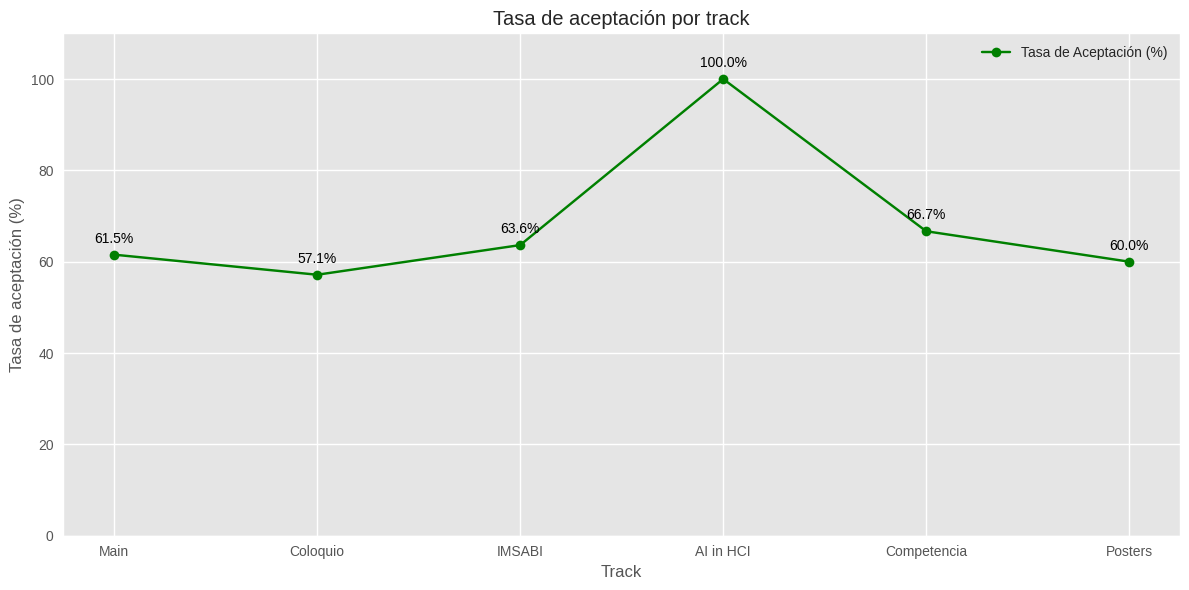

In [45]:
df_articulos['Total'] = df_articulos['Aceptados'] + df_articulos['Rechazados']
df_articulos['Tasa de Aceptación (%)'] = (df_articulos['Aceptados'] / df_articulos['Total']) * 100

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_articulos['Track'], df_articulos['Tasa de Aceptación (%)'], marker='o', linestyle='-', color='green', label='Tasa de Aceptación (%)')

for i, txt in enumerate(df_articulos['Tasa de Aceptación (%)']):
    ax.text(i, txt + 2, f'{txt:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

ax.set_xlabel('Track')
ax.set_ylabel('Tasa de aceptación (%)')
ax.set_title('Tasa de aceptación por track')
ax.set_ylim(0, 110)
ax.grid(True)

ax.legend()

plt.tight_layout()
plt.show()

### Proporción de artículos para MexIHC 2024

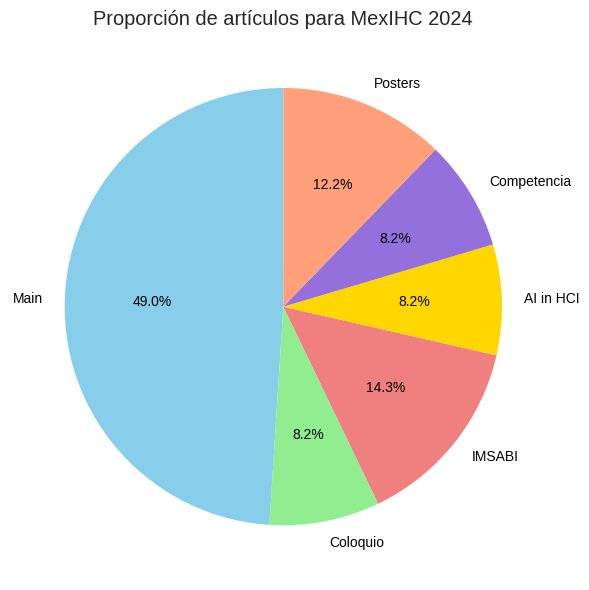

In [54]:
total_aceptados = df_articulos['Aceptados'].sum()
df_articulos['Proporción Aceptados (%)'] = (df_articulos['Aceptados'] / total_aceptados) * 100

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'mediumpurple', 'lightsalmon']

ax.pie(df_articulos['Proporción Aceptados (%)'], labels=df_articulos['Track'], autopct='%1.1f%%', startangle=90, colors=colors, textprops={'color': 'black'})
ax.set_title('Proporción de artículos para MexIHC 2024')

plt.tight_layout()
plt.show()



## Artículos con autores del extranjero


### Estadísticas por país
- **Estados Unidos**: 6 artículos
- **Brasil**: 2 artículos
- **Canadá**: 1 artículo
- **España**: 1 artículo
- **Noruega**: 1 artículo (coautor en artículo con Estados Unidos)

*Nota: Un artículo tiene autores de **dos países** (Estados Unidos y Noruega).*

### Estadísticas por track del evento
- **Coloquio**: 1 artículo
- **Main**: 6 artículos
- **IMSABI**: 1 artículo
- **AI in HCI**: 1 artículo

### Resumen general
- **Total de artículos**: 10
- **Total de países representados**: 5 (Estados Unidos, Brasil, Canadá, España, Noruega)
- **Artículos con autores de múltiples países**: 1 (Estados Unidos y Noruega)

## Distribución de artículos nacionales y extranjeros

,Categoría,Cantidad
0,Nacionales,39
1,Extranjeros,10


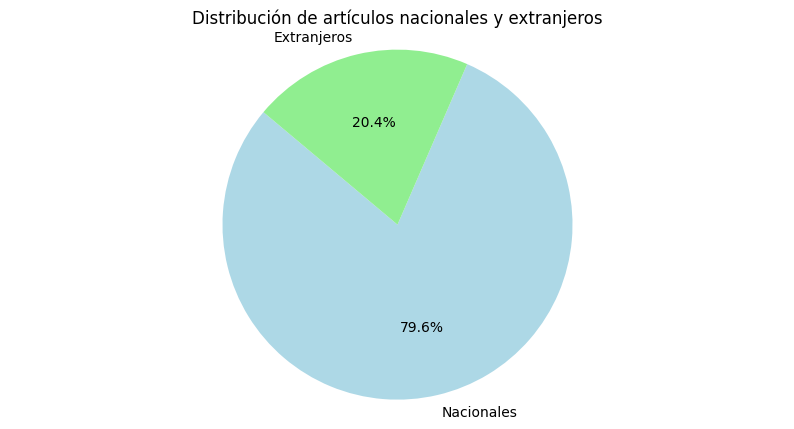

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

total_articulos = 49
articulos_extranjero = 10
articulos_nacionales = total_articulos - articulos_extranjero

datos_general = {
    'Categoría': ['Nacionales', 'Extranjeros'],
    'Cantidad': [articulos_nacionales, articulos_extranjero]
}

df_general = pd.DataFrame(datos_general)

display(df_general)

plt.figure(figsize=(10, 5))
plt.pie(df_general['Cantidad'], labels=df_general['Categoría'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Distribución de artículos nacionales y extranjeros')
plt.axis('equal')
plt.show()

## Número de artículos por país

,País,Número de Artículos
0,México,39
1,Estados Unidos,6
2,Brasil,2
3,Canadá,1
4,España,1
5,Noruega,1


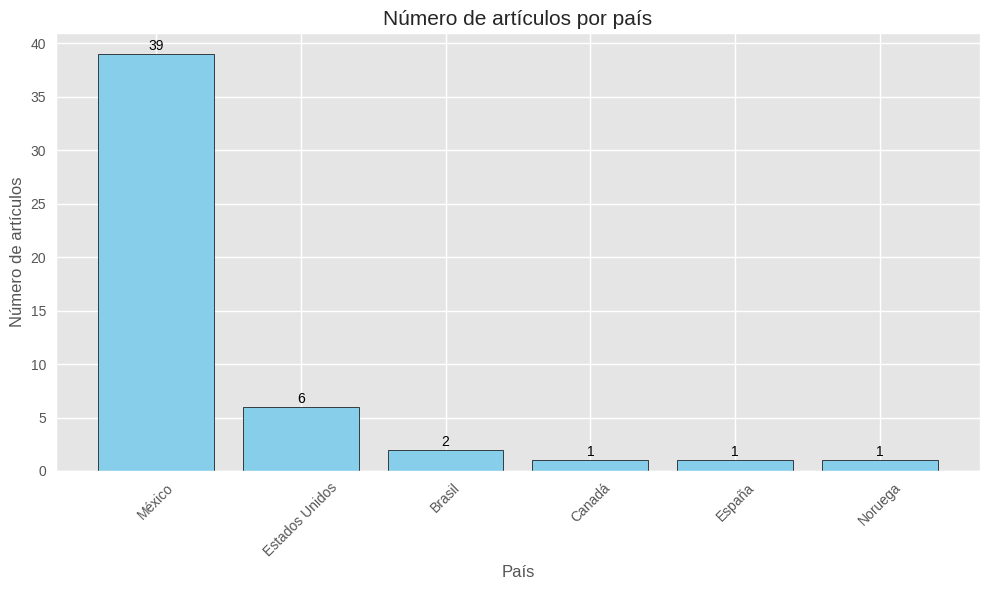

In [17]:
paises = ['México', 'Estados Unidos', 'Brasil', 'Canadá', 'España', 'Noruega']
cantidad_articulos = [39, 6, 2, 1, 1, 1]

df = pd.DataFrame({
    'País': paises,
    'Número de Artículos': cantidad_articulos
})

display(df)

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
bars = plt.bar(paises, cantidad_articulos, color='skyblue', edgecolor='black')

plt.xlabel('País', fontsize=12)
plt.ylabel('Número de artículos', fontsize=12)
plt.title('Número de artículos por país', fontsize=15)
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Número de artículos extranjeros por track del evento

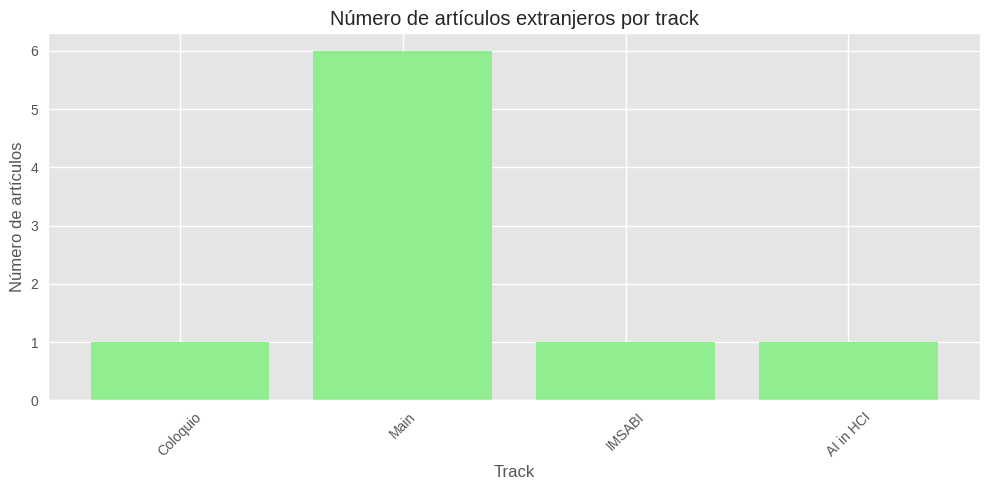

In [20]:
import matplotlib.pyplot as plt

paises = ['Estados Unidos', 'Brasil', 'Canadá', 'España', 'Noruega']
cantidad_articulos = [6, 2, 1, 1, 1]

tracks = ['Coloquio', 'Main', 'IMSABI', 'AI in HCI']
cantidad_tracks = [1, 6, 1, 1]

plt.figure(figsize=(10, 5))
plt.bar(tracks, cantidad_tracks, color='lightgreen')
plt.xlabel('Track')
plt.ylabel('Número de artículos')
plt.title('Número de artículos extranjeros por track')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Porcentaje de artículos nacionales y extranjeros

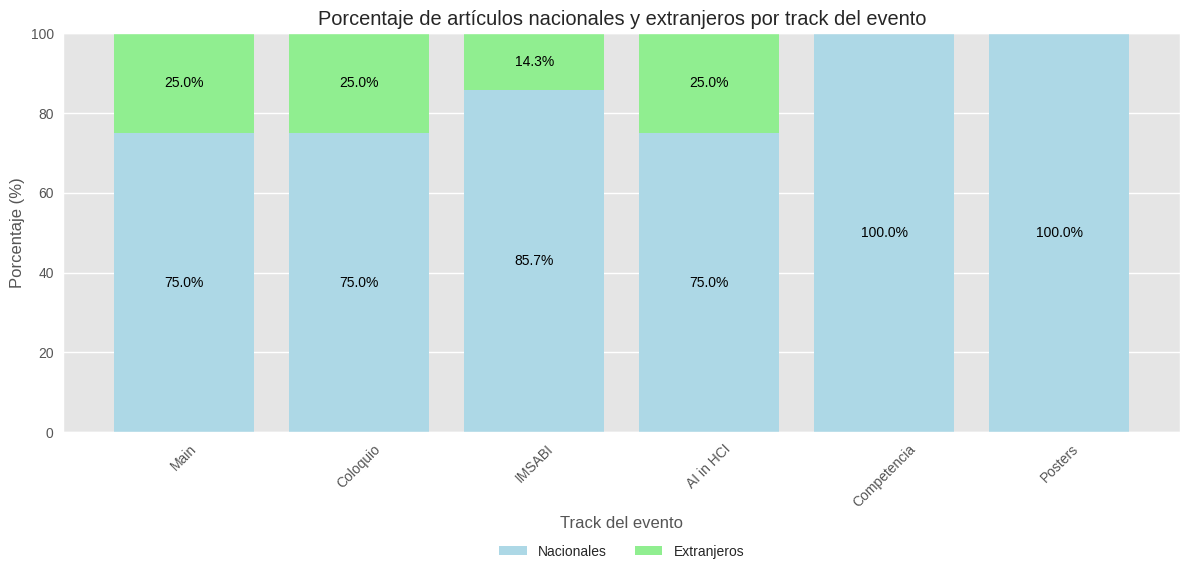

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

tracks_totales = {
    'Track': ['Main', 'Coloquio', 'IMSABI', 'AI in HCI', 'Competencia', 'Posters'],
    'Cantidad Total': [24, 4, 7, 4, 4, 6]
}

df_tracks_totales = pd.DataFrame(tracks_totales)

articulos_extranjero_por_track_dict = {
    'Main': 6,
    'Coloquio': 1,
    'IMSABI': 1,
    'AI in HCI': 1,
    'Competencia': 0,
    'Posters': 0
}

df_tracks_totales['Cantidad Extranjeros'] = df_tracks_totales['Track'].map(articulos_extranjero_por_track_dict).fillna(0).astype(int)
df_tracks_totales['Cantidad Nacionales'] = df_tracks_totales['Cantidad Total'] - df_tracks_totales['Cantidad Extranjeros']
df_tracks_totales['Porcentaje Extranjeros'] = (df_tracks_totales['Cantidad Extranjeros'] / df_tracks_totales['Cantidad Total']) * 100
df_tracks_totales['Porcentaje Nacionales'] = (df_tracks_totales['Cantidad Nacionales'] / df_tracks_totales['Cantidad Total']) * 100

fig, ax = plt.subplots(figsize=(12, 6))
y_pos = range(len(df_tracks_totales['Track']))

bars_nacionales = ax.bar(y_pos, df_tracks_totales['Porcentaje Nacionales'], color='lightblue', label='Nacionales')
bars_extranjeros = ax.bar(y_pos, df_tracks_totales['Porcentaje Extranjeros'], bottom=df_tracks_totales['Porcentaje Nacionales'], color='lightgreen', label='Extranjeros')

for bar in bars_nacionales:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', ha='center', va='center', color='black')

for bar in bars_extranjeros:
    height = bar.get_height()
    if height > 0:  # Solo agregar etiqueta si la barra tiene valor mayor a 0
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{height:.1f}%', ha='center', va='center', color='black')

ax.set_xticks(y_pos)
ax.set_xticklabels(df_tracks_totales['Track'], rotation=45)
ax.set_xlabel('Track del evento')
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Porcentaje de artículos nacionales y extranjeros por track del evento')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.tight_layout()
plt.show()


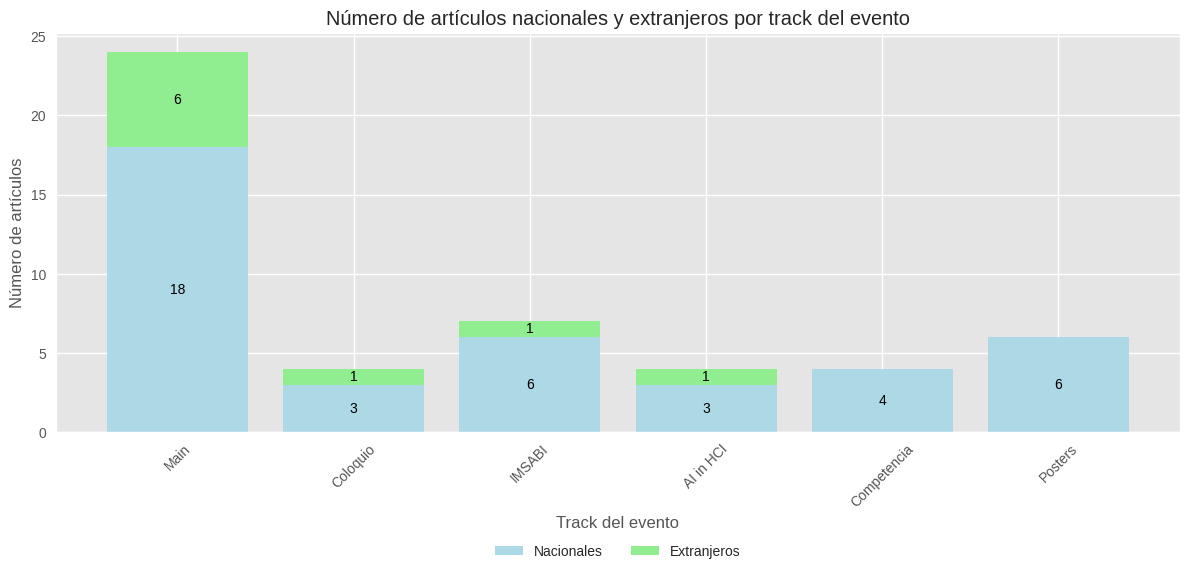

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
y_pos = range(len(df_tracks_totales['Track']))

bars_nacionales = ax.bar(y_pos, df_tracks_totales['Cantidad Nacionales'], color='lightblue', label='Nacionales')
bars_extranjeros = ax.bar(y_pos, df_tracks_totales['Cantidad Extranjeros'], bottom=df_tracks_totales['Cantidad Nacionales'], color='lightgreen', label='Extranjeros')

for bar in bars_nacionales:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(height)}', ha='center', va='center', color='black')

for bar in bars_extranjeros:
    height = bar.get_height()
    if height > 0:  # Solo agregar etiqueta si la barra tiene valor mayor a 0
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{int(height)}', ha='center', va='center', color='black')

ax.set_xticks(y_pos)
ax.set_xticklabels(df_tracks_totales['Track'], rotation=45)
ax.set_xlabel('Track del evento')
ax.set_ylabel('Número de artículos')
ax.set_title('Número de artículos nacionales y extranjeros por track del evento')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.tight_layout()
plt.show()
